# Обработка данных при помощи dplyr


##  "Предобработка данных средствами tidyr и dplyr"

In [28]:
options(width = 110)

# Концепция "tidy data"

. . .

В статистике стандартная форма записи табличных данных: 

>- стоблец -- переменная
>- строка -- наблюдение
. . .

Это очень удобно для дата фрейма в R

. . .

Не во всех областях анализа данных это так

. . .

Hadley Wickham: `tidyr`, `dplyr`, `ggplot2`, `ggvis`, ...


# Пакет tidyr

. . .

Рассмотрим случайные данные:


In [29]:
set.seed(1122)
df <- data.frame(Name = c("John", "Peter", "Mary", "Caroline"),
                 DrugA_T1 = runif(4, 35, 36),
                 DrugA_T2 = runif(4, 36, 39),
                 DrugB_T1 = runif(4, 36, 36.6),
                 DrugB_T2 = runif(4, 37, 38.5)
)
df

Name,DrugA_T1,DrugA_T2,DrugB_T1,DrugB_T2
John,35.07729,37.41580,36.17455,37.44987
Peter,35.01392,37.41355,36.00115,37.88969
Mary,35.67363,38.92508,36.49993,38.25544
Caroline,35.14321,36.52195,36.05723,38.08802


# Связка `gather`-`spread`

. . .

Из "широкого" в "длинный" формат (wide to long):

In [30]:
library(tidyr)
gather(df, Variable, Temperature, -Name)

Name,Variable,Temperature
John,DrugA_T1,35.07729
Peter,DrugA_T1,35.01392
Mary,DrugA_T1,35.67363
Caroline,DrugA_T1,35.14321
John,DrugA_T2,37.41580
Peter,DrugA_T2,37.41355
Mary,DrugA_T2,38.92508
Caroline,DrugA_T2,36.52195
John,DrugB_T1,36.17455
Peter,DrugB_T1,36.00115


# Связка `separate`-`unite`

. . .

Разделение переменных:


In [31]:
df <- gather(df, Variable, Temperature, -Name)
df <- separate(df, Variable, c("DrugType", "Time"), "_")
df

Name,DrugType,Time,Temperature
John,DrugA,T1,35.07729
Peter,DrugA,T1,35.01392
Mary,DrugA,T1,35.67363
Caroline,DrugA,T1,35.14321
John,DrugA,T2,37.41580
Peter,DrugA,T2,37.41355
Mary,DrugA,T2,38.92508
Caroline,DrugA,T2,36.52195
John,DrugB,T1,36.17455
Peter,DrugB,T1,36.00115


# `dplyr`: функция `select`

. . .

In [32]:
library(dplyr)
select(df, Time, Temperature)

Time,Temperature
T1,35.07729
T1,35.01392
T1,35.67363
T1,35.14321
T2,37.41580
T2,37.41355
T2,38.92508
T2,36.52195
T1,36.17455
T1,36.00115


In [33]:
select(df, 3:4)
select(df, starts_with("T"))
select(df, -Name, -DrugType)

Time,Temperature
T1,35.07729
T1,35.01392
T1,35.67363
T1,35.14321
T2,37.41580
T2,37.41355
T2,38.92508
T2,36.52195
T1,36.17455
T1,36.00115


Time,Temperature
T1,35.07729
T1,35.01392
T1,35.67363
T1,35.14321
T2,37.41580
T2,37.41355
T2,38.92508
T2,36.52195
T1,36.17455
T1,36.00115


Time,Temperature
T1,35.07729
T1,35.01392
T1,35.67363
T1,35.14321
T2,37.41580
T2,37.41355
T2,38.92508
T2,36.52195
T1,36.17455
T1,36.00115


# `dplyr`: функция `filter`

. . .

In [35]:
filter(df, Temperature > 37, Name %in% c("John", "Mary"))
# select действует по колонкам, а filter по сериям

Name,DrugType,Time,Temperature
John,DrugA,T2,37.41580
Mary,DrugA,T2,38.92508
John,DrugB,T2,37.44987
Mary,DrugB,T2,38.25544


# `dplyr`: функция `arrange`

. . . 


In [40]:
arrange(df, Name, -Temperature)
# сортировка из df пo Name и обратная по Temperature

Name,DrugType,Time,Temperature
Caroline,DrugB,T2,38.08802
Caroline,DrugA,T2,36.52195
Caroline,DrugB,T1,36.05723
Caroline,DrugA,T1,35.14321
John,DrugB,T2,37.44987
John,DrugA,T2,37.41580
John,DrugB,T1,36.17455
John,DrugA,T1,35.07729
Mary,DrugA,T2,38.92508
Mary,DrugB,T2,38.25544


# `dplyr`: функция `mutate`

In [39]:
mutate(df, DrugType = gsub("Drug", "", DrugType))
#создавать или изменять переменные столбцов

Name,DrugType,Time,Temperature
John,A,T1,35.07729
Peter,A,T1,35.01392
Mary,A,T1,35.67363
Caroline,A,T1,35.14321
John,A,T2,37.41580
Peter,A,T2,37.41355
Mary,A,T2,38.92508
Caroline,A,T2,36.52195
John,B,T1,36.17455
Peter,B,T1,36.00115


# `dplyr`: связка функций `group_by` и `summarise`

In [41]:
summarize(group_by(df, Time), 
          AvgTemp = mean(Temperature))

Time,AvgTemp
T1,35.70511
T2,37.74493


# Полезные ссылки

>- `library(data.table)`
>- Cheat sheet по tidyr и dplyr: [https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf)
>- Современный взгляд на предобработку данных: dplyr, tidyr и magrittr. [https://github.com/tonytonov/spbr-1-dataproc](https://github.com/tonytonov/spbr-1-dataproc)


# Конвейеры: оператор `%>%`

In [84]:
df <- data.frame(type = c(1, 1, 2, 2, 3, 3), value = c(5, 10, 50, 100, 7, 7))

Вложенные вызовы, создание (перезапись) дата фреймов:

In [86]:
arrange(
  summarise(
    group_by(df, type), 
    total = sum(value)
  ),
  -total
)

type,total
2,150
1,15
3,14


In [87]:
a <- group_by(df, type)
b <- summarise(a, total = sum(value))
c <- arrange(b, -total)

Конвейер:

In [88]:
df %>%
  group_by(type) %>%
  summarise(total = sum(value)) %>%
  arrange(-total)

type,total
2,150
1,15
3,14


# Конвейеры: оператор `%>%`

Эквивалентная запись:
>- `x %>% f` <br>  `f(x)`
>- `x %>% f(y)` <br> `f(x, y)`
>- `x %>% f(y, param = .)` <br> `f(y, param = x)`


In [99]:
# Using dplyr 
library(stringr)
library(dplyr)
options(stringsAsFactors = FALSE)
url = "https://raw.githubusercontent.com/tonytonov/Rcourse/master/R%20programming/avianHabitat.csv"

In [100]:
# First approach
avian <- read.csv(url)

avian <- subset(avian, PDB > 0 & DBHt > 0, c("Site", "Observer", "PDB", "DBHt"))
avian$Site <- factor(str_replace(avian$Site, "[:digit:]+", ""))
subset(
  aggregate(avian$DBHt, list(Site = avian$Site, Observer = avian$Observer), max),
  x >= 5
)

,Site,Observer,x
1,BunkerHill,JT,9.9
3,BunkerHill,RA,7.0
5,HortonCreek,RA,10.0
7,McAdamCreek,RA,7.2
11,McAdamCreek,RR,5.0


In [97]:
# Second approach (using pipes)
avian <- read.csv(url)

avian <-
  avian %>% 
  subset(PDB > 0 & DBHt > 0, c("Site", "Observer", "PDB", "DBHt")) %>% 
  transform(Site = factor(str_replace(.$Site, "[:digit:]+", "")))

aggregate(avian$DBHt, list(Site = avian$Site, Observer = avian$Observer), max) %>% 
  subset(x >= 5)

,Site,Observer,x
1,BunkerHill,JT,9.9
3,BunkerHill,RA,7.0
5,HortonCreek,RA,10.0
7,McAdamCreek,RA,7.2
11,McAdamCreek,RR,5.0


In [98]:
# Third approach (using both pipes and dplyr)
avian <- read.csv(url)

avian %>% 
  filter(PDB > 0, DBHt > 0) %>% 
  select(Site, Observer, contains("DB")) %>% 
  mutate(Site = factor(str_replace(Site, "[:digit:]+", ""))) %>% 
  group_by(Site, Observer) %>% 
  summarise(MaxHt = max(DBHt)) %>% 
  filter(MaxHt >= 5) 

Site,Observer,MaxHt
BunkerHill,JT,9.9
BunkerHill,RA,7.0
HortonCreek,RA,10.0
McAdamCreek,RA,7.2
McAdamCreek,RR,5.0


In [104]:
subset(avian, PDB > 0, c("Observer", "PDB"))

,Observer,PDB
1,RA,3
2,RA,2
3,RA,4
4,RA,3
5,RA,4
6,JT,3
7,JT,3
8,JT,2
9,JT,2
10,JT,2


In [105]:
summarise(group_by(avian, Observer), x = sum(PDB > 0))


Observer,x
JT,92
RA,261
RR,139


In [106]:
aggregate(avian[, "PDB"], list(Observer = avian[, "Observer"]), function(x) sum(x > 0))

Observer,x
JT,92
RA,261
RR,139


In [107]:
avian[, "PDB"] <- avian[, "PDB"] > 0

In [108]:
mutate(avian, PDB = PDB > 0)

Site,Observer,PDB,DBHt
BunkerHill,RA,TRUE,5.2
BunkerHill,RA,TRUE,3.1
BunkerHill,RA,TRUE,5.5
BunkerHill,RA,TRUE,6.2
BunkerHill,RA,TRUE,5.4
BunkerHill,JT,TRUE,4.0
BunkerHill,JT,TRUE,5.2
BunkerHill,JT,TRUE,4.4
BunkerHill,JT,TRUE,5.7
BunkerHill,JT,TRUE,4.8


Чувствуете, как от простейших функций на дата фреймах вроде str и summary мы добрались до практически безграничных возможностей? Раньше мы могли только в полуручном режиме оценить, что происходит в avianHabitat. Теперь же мы в несколько простых строчек кода можем упаковать манипуляции с переменными на лету, сложные условия фильтрации и подсчёты с агрегацией по группам. 

Это последняя демонстрация ваших джедайских возможностей с дата фреймами!

Возьмите исходный avianHabitat. Примените к нему процедуру объединения по географической локации (Site). Мы будем работать со всеми имеющимися видами одновременно. Интересующая нас характеристика -- высота растений (*Ht). 

Теперь произведите следующий подсчёт по всем комбинациям места (Site) и наблюдателя (Observer). Интересующая нас статистика -- количество тех замеров, где обнаруживается хотя бы один экземпляр вида. Соберите эту статистику по всем видам. У вас получится таблица, в которой тройке вида (место M, наблюдатель N, вид P) соответствует число замеров в M, произведенных N, где обнаружен хотя бы один P.

Не будем сверять всю таблицу: в ответе укажите только диапазон нашей ключевой статистики для пяти записей в этой таблице. Удачи!

Подсказки: 

+ логично предположить, что "хотя бы один экземпляр найден" означает "максимальная высота вида строго больше нуля";
+ если вы выбрали dplyr, то может пригодиться summarise_each;
+ ещё раз о расшифровке записей в таблице: например, тройке (McAdamCreek, RR, L) соответствует число K. Это значит, что мы рассматриваем только замеры вида L, произведённые исследователем RR в месте McAdamCreek. Если в текущем замере высота L больше нуля, то там есть хотя бы один экземпляр, этот замер идёт в зачёт (+1). Всего таких замеров K. 
+ ссылка на данные("https://raw.githubusercontent.com/tonytonov/Rcourse/master/R%20programming/avianHabitat.csv").

McAdamCreek, RA, L	


BunkerHill, JT, DB	


HortonCreek, RA, E	


LivingstonCreek, RR, W	


CreteCreek, RR, H

In [36]:
library(dplyr)
url = "https://raw.githubusercontent.com/tonytonov/Rcourse/master/R%20programming/avianHabitat.csv"
df = read.csv(url)
df <- select(df,c(1,2,6,8,10,12,14,16))
df <- mutate(d, Site = gsub("[[:digit:]]", "", Site))

nrow(filter(df, Site == 'McAdamCreek', Observer == 'RA', LHt > 0))
nrow(filter(df, Site == 'BunkerHill', Observer == 'JT', DBHt > 0))
nrow(filter(df, Site == 'HortonCreek', Observer == 'RA', EHt > 0))
nrow(filter(df, Site == 'LivingstonCreek', Observer == 'RR', WHt > 0))
nrow(filter(df, Site == 'CreteCreek', Observer == 'RR', HHt > 0))

[1] 85

[1] 53

[1] 116

[1] 115

[1] 80

In [2]:
?mtcars

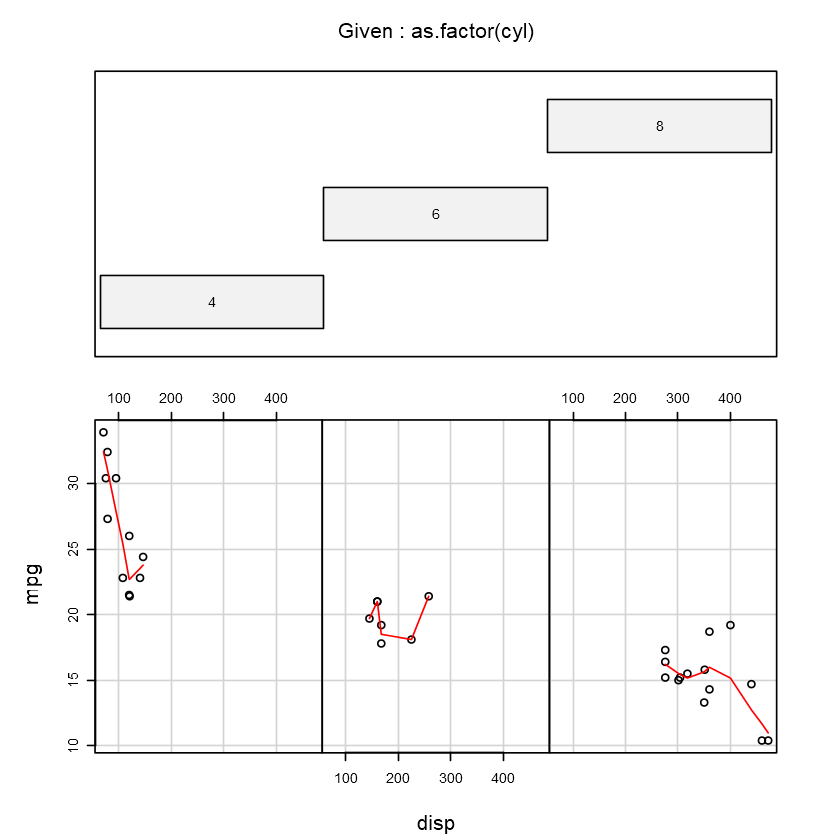

In [3]:
coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
       panel = panel.smooth, rows = 1)

Общий глоссарий для этого урока:

Tidy data

library(tidyr): ?gather, ?separate

library(dplyr):

?select

?filter

?arrange

?mutate

?group_by, ?summarise

?"%>%", piping operator